* 요일: &we=[0, 2, 3, 4, 5, 6] <br>
* 전체, 홈, 원정: &ha, &ha=H or &ha=N <br>
* 구단(14-24): &ct=[1, 2, 3, 6, 7, 9, 11, 12, 13] <br>
기아: 2
삼성: 1
두산: 6
SSG: 9
롯데: 3
한화: 7
엔씨: 12
KT: 13
키움: 11

**컬럼명 해설**<br>
```python
df_kia_thu.columns

Index(['Year', 'G', 'GS', 'W', 'L', 'S', 'HD', 'IP', 'R', 'ER', 'RS', 'RS9',
       'TBF', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'IB', 'HP', 'SO', 'SF', 'NP',
       'WHIP', 'AVG', 'OBP', 'OPS', 'ERA'],
      dtype='object')
```

연도, 게임 수, 선발, 이긴 경기 수, 진 경기 수, 세이브, 홀드, 이닝 수, 득점, 자책점, 득점 지원, 9이닝당 득점지원, 상대한 타자 수, 상대팀 타수, 안타, 2루타, 3루타, 홈런, 4구, 고의 4구, 사구, 삼진, 희생플라이, 투구 수, 이닝당 출루 허용률, 피안타율, 피출루율, 피OPS, 평균자책점

In [356]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from re import escape
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

plt.rcParams['font.family'] = 'Malgun Gothic'

---

# 1. 전체

In [2]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

team_list = [1, 2, 3, 6, 7, 9, 11, 12, 13]  #삼성, 기아, 롯데, 두산, 한화, SSG, 키움, 엔씨, KT
df_team_list = []    #전체 구단 데이터프레임 담을 리스트

for team in team_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha&ct={}&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(team)
    driver.get(url)

    try:
        div = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        print(team)
        print(url)

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all('th')]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_team_list.append(df) #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음: ", e)

    
df_team = pd.concat(df_team_list)   #전체 데이터프레임 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_team.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_team.columns = col_list

#데이터타입 변경
df_team = df_team.astype(float)

#연도 데이터 타입 정수형으로 변경
df_team.Year = df_team.Year.astype(int)

df_team

1
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha&ct=1&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
2
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha&ct=2&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
3
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha&ct=3&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
6
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po

,Year,G,GS,W,L,S,HD,IP,R,ER,...,IB,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA
0,2015,71.0,16.0,5.0,11.0,3.0,1.0,139.0,109.0,101.0,...,3.0,9.0,92.0,7.0,2438.0,1.50,0.285,0.357,0.845,6.54
1,2016,70.0,16.0,7.0,9.0,0.0,7.0,140.0,88.0,84.0,...,1.0,14.0,82.0,6.0,2432.0,1.56,0.286,0.369,0.781,5.40
2,2017,61.0,16.0,10.0,6.0,3.0,3.0,143.0,82.0,71.0,...,2.0,8.0,100.0,7.0,2332.0,1.25,0.262,0.309,0.702,4.47
3,2018,67.0,16.0,9.0,7.0,3.0,7.0,141.0,94.0,81.0,...,0.0,8.0,122.0,6.0,2397.0,1.50,0.291,0.348,0.774,5.17
4,2019,57.0,16.0,10.0,6.0,6.0,3.0,142.0,66.0,53.0,...,1.0,10.0,117.0,5.0,2323.0,1.20,0.244,0.304,0.673,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,82.0,16.0,9.0,7.0,3.0,8.0,145.0,90.0,84.0,...,1.0,11.0,114.0,4.0,2498.0,1.55,0.297,0.372,0.828,5.21
6,2021,73.0,16.0,6.0,8.0,3.0,8.0,142.0,75.0,67.0,...,2.0,7.0,114.0,3.0,2399.0,1.37,0.244,0.331,0.672,4.25
7,2022,85.0,16.0,9.0,7.0,4.0,13.0,143.1,59.0,51.0,...,3.0,3.0,123.0,3.0,2443.0,1.20,0.227,0.295,0.633,3.20
8,2023,92.0,16.0,10.0,6.0,4.0,20.0,146.1,85.0,74.0,...,2.0,5.0,106.0,5.0,2601.0,1.57,0.285,0.359,0.756,4.55


In [3]:
#'승률' 컬럼 추가
df_team['winning_rate'] = (df_team['W'] / df_team['G'] *100).round(2)
df_team

,Year,G,GS,W,L,S,HD,IP,R,ER,...,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA,winning_rate
0,2015,71.0,16.0,5.0,11.0,3.0,1.0,139.0,109.0,101.0,...,9.0,92.0,7.0,2438.0,1.50,0.285,0.357,0.845,6.54,7.04
1,2016,70.0,16.0,7.0,9.0,0.0,7.0,140.0,88.0,84.0,...,14.0,82.0,6.0,2432.0,1.56,0.286,0.369,0.781,5.40,10.00
2,2017,61.0,16.0,10.0,6.0,3.0,3.0,143.0,82.0,71.0,...,8.0,100.0,7.0,2332.0,1.25,0.262,0.309,0.702,4.47,16.39
3,2018,67.0,16.0,9.0,7.0,3.0,7.0,141.0,94.0,81.0,...,8.0,122.0,6.0,2397.0,1.50,0.291,0.348,0.774,5.17,13.43
4,2019,57.0,16.0,10.0,6.0,6.0,3.0,142.0,66.0,53.0,...,10.0,117.0,5.0,2323.0,1.20,0.244,0.304,0.673,3.36,17.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,82.0,16.0,9.0,7.0,3.0,8.0,145.0,90.0,84.0,...,11.0,114.0,4.0,2498.0,1.55,0.297,0.372,0.828,5.21,10.98
6,2021,73.0,16.0,6.0,8.0,3.0,8.0,142.0,75.0,67.0,...,7.0,114.0,3.0,2399.0,1.37,0.244,0.331,0.672,4.25,8.22
7,2022,85.0,16.0,9.0,7.0,4.0,13.0,143.1,59.0,51.0,...,3.0,123.0,3.0,2443.0,1.20,0.227,0.295,0.633,3.20,10.59
8,2023,92.0,16.0,10.0,6.0,4.0,20.0,146.1,85.0,74.0,...,5.0,106.0,5.0,2601.0,1.57,0.285,0.359,0.756,4.55,10.87


In [4]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 9
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          90 non-null     int32  
 1   G             90 non-null     float64
 2   GS            90 non-null     float64
 3   W             90 non-null     float64
 4   L             90 non-null     float64
 5   S             90 non-null     float64
 6   HD            90 non-null     float64
 7   IP            90 non-null     float64
 8   R             90 non-null     float64
 9   ER            90 non-null     float64
 10  RS            90 non-null     float64
 11  RS9           90 non-null     float64
 12  TBF           90 non-null     float64
 13  AB            90 non-null     float64
 14  H             90 non-null     float64
 15  2B            90 non-null     float64
 16  3B            90 non-null     float64
 17  HR            90 non-null     float64
 18  BB            90 non-null     float64


In [5]:
df_team.describe()

,Year,G,GS,W,L,S,HD,IP,R,ER,...,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA,winning_rate
count,90.000000,90.000000,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2019.500000,73.922222,16.0,8.344444,7.288889,3.755556,7.800000,142.341111,75.200000,67.533333,...,9.866667,113.333333,5.433333,2396.188889,1.398778,0.265000,0.338744,0.725922,4.271000,11.370889
std,2.888373,8.147830,0.0,2.219227,2.264749,1.602744,3.880808,2.772128,17.230884,16.102341,...,3.901023,14.402715,2.360965,113.605655,0.163417,0.027278,0.027023,0.070949,1.033437,3.140880
min,2015.000000,57.000000,16.0,1.000000,3.000000,0.000000,0.000000,135.100000,42.000000,36.000000,...,3.000000,82.000000,1.000000,2172.000000,1.140000,0.214000,0.293000,0.591000,2.280000,1.450000
25%,2017.000000,67.000000,16.0,7.000000,6.000000,3.000000,5.000000,140.100000,61.250000,54.250000,...,7.000000,106.000000,4.000000,2323.250000,1.272500,0.244000,0.317250,0.673000,3.510000,9.052500
50%,2019.500000,73.000000,16.0,8.500000,7.000000,4.000000,8.000000,142.000000,74.500000,67.000000,...,10.000000,114.000000,5.000000,2394.500000,1.370000,0.265500,0.339000,0.723500,4.240000,11.180000
75%,2022.000000,80.000000,16.0,10.000000,9.000000,5.000000,10.000000,144.200000,85.000000,77.000000,...,12.000000,122.750000,7.000000,2443.000000,1.510000,0.282500,0.358000,0.773250,4.910000,13.467500
max,2024.000000,92.000000,16.0,13.000000,15.000000,8.000000,21.000000,150.000000,128.000000,113.000000,...,22.000000,157.000000,12.000000,2707.000000,1.870000,0.340000,0.404000,0.928000,7.150000,20.000000


In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [133]:
#변수 중요도 확인 - 변수 설정
data = df_team.loc[:, 'S':'ERA']    #독립변수
target = df_team['winning_rate']    #종속변수

In [134]:
#데이터 분할
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((72, 24), (18, 24), (72,), (18,))

In [139]:
rf = RandomForestRegressor(n_estimators=500, random_state=42, bootstrap=True)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)  #교차검증
rf.fit(train_input, train_target)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9251840514886565 0.36887432353347355


In [140]:
importances = rf.feature_importances_
feature_names = train_input.columns

#랜덤 포레스트 변수 중요도
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#상위 15개 선택
selected_features = importance_df['Feature'].head(15).tolist()
selected_features

['RS',
 'RS9',
 'OPS',
 'AVG',
 'OBP',
 'WHIP',
 'HR',
 'ER',
 'ERA',
 'TBF',
 'SF',
 'H',
 'R',
 'AB',
 'S']

**특성 중요도**
|  요인   |     한국어    |  분류   |
|:---:|:---:|:---:|
| RS   | 득점지원  | 타자  |
| RS9  | 9이닝당 득점지원 | 타자  |
| OPS  | 피OPS    | 투수  |
| AVG  | 피안타율  | 투수  |
| OBP  | 피출루율  | 투수  |
| WHIP | 이닝당 출루 허용률 | 투수  |
| HR   | 홈런     | 타자  |
| ER   | 자책점   | 투수  |
| ERA  | 평균자책점 | 투수  |
| TBF  | 상대한 타자 수 | 투수  |
| SF   | 희생플라이  | 타자  |
| H    | 안타     | 타자  |
| R    | 득점     | 타자  |
| AB   | 상대팀 타수 | 투수  |
| S    | 홀드     | 투수  |

In [353]:
#투수지표와 타자지표에서 각각 5개로 필터링
selected_features = ['RS', 'RS9', 'HR', 'SF', 'H', 'OPS', 'AVG', 'OBP', 'WHIP', 'ER']

In [141]:
#각 팀별 연도에 따른 승률
teams = ['삼성', '기아', '롯데', '두산', '한화', 'SSG', '키움', 'NC', 'KT']

#팀 10번 반복
team_columns = np.concatenate([np.repeat(team, 10) for team in teams])

df_team['team'] = team_columns

df_team_win = df_team[['Year', 'winning_rate', 'team']]
df_team_win_pivot= df_team_win.pivot_table(index='team', columns='Year')

df_team_win_pivot

winning_rate                                                          \
Year         2015   2016   2017   2018   2019   2020   2021   2022   2023   
team                                                                        
KT          12.70  13.33  13.10  12.68  18.84  10.98   8.22  10.59  10.87   
NC          15.38   7.41   7.46  11.11  11.43  10.34  10.96  11.49   6.98   
SSG          7.58   8.45  10.00   9.38   8.22  20.00   7.89   8.64  15.19   
기아          13.85  12.12   8.82  14.29  15.15  15.07  12.16  12.50   7.95   
두산          12.31   9.33   8.33   1.45   8.96   7.41   6.59  11.76  14.47   
롯데           8.11   9.30  10.61  10.67  15.15  10.77  11.84   8.97  12.05   
삼성           7.04  10.00  16.39  13.43  17.54  10.14  10.39  14.46  14.08   
키움           8.70  13.89  15.38  17.74  10.61   9.68  11.25  12.50  12.94   
한화           8.97  11.25  10.61  12.07  13.85  15.94  14.29  13.48  11.69   

             
Year   2024  
team         
KT    10.71  
NC    14.63  
SSG   13.75  
기아     3.95  
두산    11.84  
롯데    12.64  
삼성     9.86  
키움     8.22  
한화    10.26

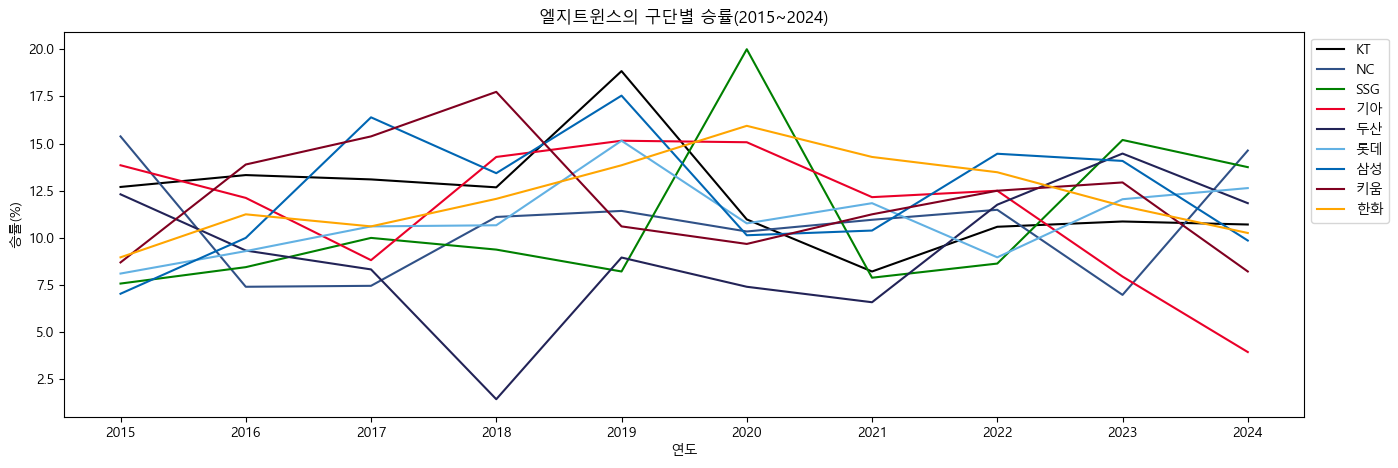

In [143]:
x_val = df_team_win_pivot.columns.get_level_values(1) #X축(Year)
label_val = list(df_team_win_pivot.index)   #범례(team)
colors = ['black', '#305187', 'green', '#EA0029', '#222357', '#62B1E3', '#0066B3', '#800020', 'orange']

plt.figure(figsize=(16, 5))

for i in range(len(df_team_win_pivot)):
    color = colors[i % len(colors)]
    plt.plot(x_val, df_team_win_pivot.iloc[i, :].values, label=label_val[i], color=color)

plt.xticks(range(2015, 2025))
plt.title("엘지트윈스의 구단별 승률(2015~2024)")
plt.xlabel("연도")
plt.ylabel("승률(%)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

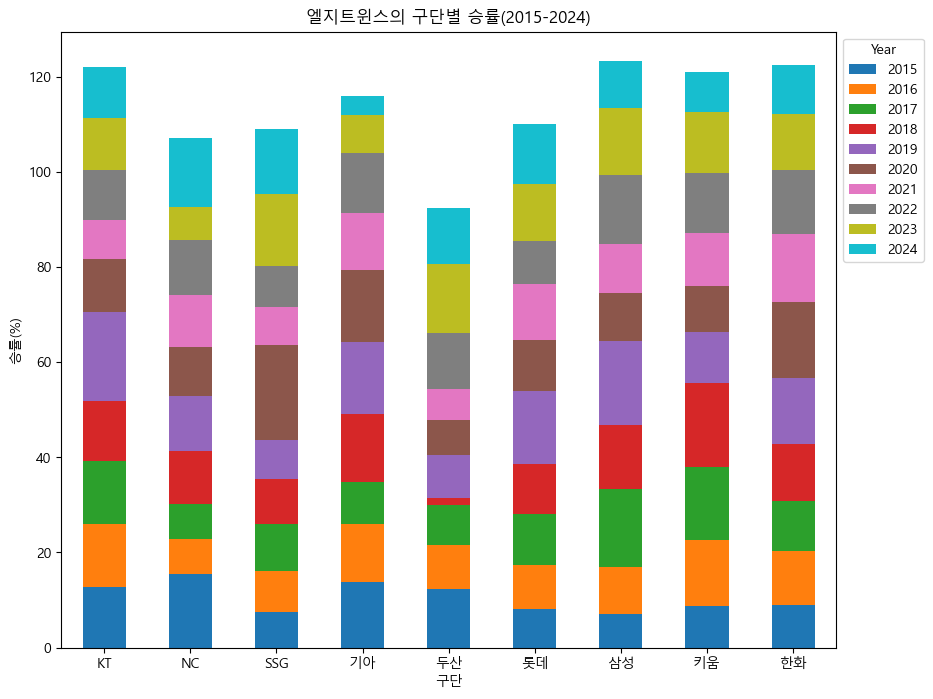

In [144]:
label = list(df_team_win_pivot.columns.get_level_values(1))

ax = df_team_win_pivot.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xticks(rotation=0)
ax.legend(labels=label, title='Year', bbox_to_anchor=(1,1))
ax.set_title('엘지트윈스의 구단별 승률(2015-2024)')
ax.set_xlabel('구단')
ax.set_ylabel('승률(%)')
plt.show()

In [145]:
df_team_win_list = []

#구단명 목록
teams = ['KT', 'NC', 'SSG', '기아', '두산', '롯데', '삼성', '키움', '한화']

for team in teams:
    #각 팀에 대해 데이터 필터링
    df_team_win_team = df_team_win.query(f"team == '{team}'")
    
    #승률 차이 담을 새 컬럼 추가
    df_team_win_team[team] = 0
    df_team_win_team[team] = df_team_win_team[team].astype(float)
    
    #승률 차이 계산
    for i in range(len(df_team_win_team)-1):
        df_team_win_team.iloc[i+1, -1] = df_team_win_team.iloc[i+1, 1] - df_team_win_team.iloc[i, 1]
    
    #리스트에 추가
    df_team_win_list.append(df_team_win_team[[team]])

#결합
df_team_win_sub = pd.concat(df_team_win_list, axis=1)

#'연도' 컬럼 추가
df_team_win_sub['year'] = list(range(2015, 2025))
df_team_win_sub.set_index('year', inplace=True)

df_team_win_sub

C:\Users\m\AppData\Local\Temp\ipykernel_17060\89484095.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_win_team[team] = 0
C:\Users\m\AppData\Local\Temp\ipykernel_17060\89484095.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_win_team[team] = df_team_win_team[team].astype(float)
C:\Users\m\AppData\Local\Temp\ipykernel_17060\89484095.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,KT,NC,SSG,기아,두산,롯데,삼성,키움,한화
year,,,,,,,,,
2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2016,0.63,-7.97,0.87,-1.73,-2.98,1.19,2.96,5.19,2.28
2017,-0.23,0.05,1.55,-3.30,-1.00,1.31,6.39,1.49,-0.64
2018,-0.42,3.65,-0.62,5.47,-6.88,0.06,-2.96,2.36,1.46
2019,6.16,0.32,-1.16,0.86,7.51,4.48,4.11,-7.13,1.78
2020,-7.86,-1.09,11.78,-0.08,-1.55,-4.38,-7.40,-0.93,2.09
2021,-2.76,0.62,-12.11,-2.91,-0.82,1.07,0.25,1.57,-1.65
2022,2.37,0.53,0.75,0.34,5.17,-2.87,4.07,1.25,-0.81
2023,0.28,-4.51,6.55,-4.55,2.71,3.08,-0.38,0.44,-1.79


In [150]:
teams = ['KT', 'NC', 'SSG', '기아', '두산', '롯데', '삼성', '키움', '한화']
downCounts = {}

for team in teams:
    downCounts[team] = len(df_team_win_sub.query(f"{team} < 0")[team])

downCounts

{'KT': 5,
 'NC': 3,
 'SSG': 4,
 '기아': 6,
 '두산': 6,
 '롯데': 2,
 '삼성': 4,
 '키움': 3,
 '한화': 5}

In [153]:
#구단명 목록
teams = ['KT', 'NC', 'SSG', '기아', '두산', '롯데', '삼성', '키움', '한화']

downCounts = {}
upCounts = {}

#전년도 대비 승률 음수
for team in teams:
    downCounts[team] = len(df_team_win_sub.query(f"{team} < 0")[team])

#전년도 대비 승률 양수
for team in teams:
    upCounts[team] = len(df_team_win_sub.query(f"{team} > 0")[team])

print(downCounts)
print(upCounts)

{'KT': 5, 'NC': 3, 'SSG': 4, '기아': 6, '두산': 6, '롯데': 2, '삼성': 4, '키움': 3, '한화': 5}
{'KT': 4, 'NC': 6, 'SSG': 5, '기아': 3, '두산': 3, '롯데': 7, '삼성': 5, '키움': 6, '한화': 4}


In [154]:
team = {
    'down': downCount,
    'up': upCount
}
columns = ['down' ,'up']
index = ['KT', 'NC', 'SSG', '기아', '두산', '롯데', '삼성', '키움', '한화']

df_team_win_updown = pd.DataFrame(team, columns=columns, index=index)
df_team_win_updown

,down,up
KT,5,4
NC,3,6
SSG,4,5
기아,6,3
두산,6,3
롯데,2,7
삼성,4,5
키움,3,6
한화,5,4


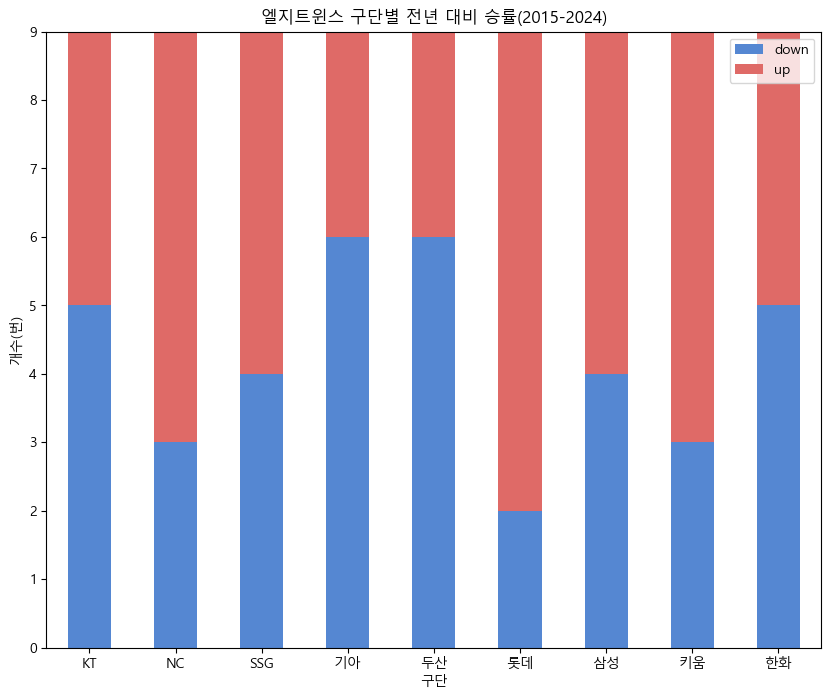

In [155]:
color = ['#5587D2', '#DF6A67']
ax = df_team_win_updown.plot(kind='bar', stacked=True, figsize=(10, 8), color=color)
plt.xticks(rotation=0)
ax.set_title('엘지트윈스 구단별 전년 대비 승률(2015-2024)')
ax.set_xlabel('구단')
ax.set_ylabel('개수(번)')
ax.set_ylim(0,9)
plt.show()

---

In [354]:
#컬럼 추가
selected_features.append('Year') #연도
#selected_features.append('G')    #게임수
selected_features.append('winning_rate') #승률

In [357]:
selected_features

['RS',
 'RS9',
 'HR',
 'SF',
 'H',
 'OPS',
 'AVG',
 'OBP',
 'WHIP',
 'ER',
 'Year',
 'winning_rate']

# 2. 기아타이거즈

In [358]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_kia_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=2&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_kia_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_kia = pd.concat(df_kia_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_kia.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_kia.columns = col_list

#데이터타입 변경
df_kia = df_kia.astype(float)

#연도 데이터 타입 정수형으로 변경
df_kia.Year = df_kia.Year.astype(int)

#승률 데이터 추가
df_kia['winning_rate'] = (df_kia['W'] / df_kia['G'] *100).round(2)

df_kia = df_kia[selected_features]

df_kia.shape  #(20, 12)

(20, 12)

In [359]:
df_kia.reset_index(inplace=True)
df_kia

,index,RS,RS9,HR,SF,H,OPS,AVG,OBP,WHIP,ER,Year,winning_rate
0,0,39.0,4.9,3.0,3.0,74.0,0.717,0.277,0.331,1.25,26.0,2015,16.13
1,1,39.0,4.7,5.0,2.0,68.0,0.639,0.244,0.313,1.21,27.0,2016,13.33
2,2,41.0,5.2,9.0,4.0,79.0,0.790,0.285,0.342,1.42,39.0,2017,12.90
3,3,43.0,5.4,7.0,3.0,64.0,0.673,0.241,0.312,1.26,32.0,2018,20.00
4,4,58.0,7.3,2.0,3.0,65.0,0.657,0.243,0.329,1.35,29.0,2019,18.75
5,5,52.0,6.4,2.0,1.0,60.0,0.589,0.220,0.307,1.27,24.0,2020,15.79
6,6,40.0,4.9,7.0,1.0,68.0,0.682,0.243,0.336,1.42,22.0,2021,12.50
7,7,25.0,3.1,5.0,3.0,62.0,0.654,0.230,0.305,1.24,29.0,2022,10.26
8,8,27.0,3.7,4.0,3.0,70.0,0.708,0.278,0.339,1.43,29.0,2023,5.13
9,9,34.0,3.7,7.0,6.0,110.0,0.838,0.330,0.388,1.71,58.0,2024,4.17


In [448]:
df_kiaH = df_kia.iloc[:10, 1:]  #홈
df_kiaA = df_kia.iloc[10:, 1:]  #원정정

In [509]:
#홈
years = np.array(df_kiaH[['Year']]) #연도
record = np.array(df_kiaH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_kiaH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_kiaH = model_wr.predict(pred_x)[0]
print(f"2025년 기아타이거즈 상대 홈 예상 승률: {predicted_kiaH:.2f}%")

2025년 기아타이거즈 상대 홈 예상 승률: 6.11%


In [510]:
#원정
years = np.array(df_kiaA[['Year']]) #연도
record = np.array(df_kiaA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_kiaA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_kiaA = model_wr.predict(pred_x)[0]
print(f"2025년 기아타이거즈 상대 원정 예상 승률: {predicted_kiaA:.2f}%")

2025년 기아타이거즈 상대 원정 예상 승률: 9.58%


# 3. 삼성라이온즈

In [461]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_samsung_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=1&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_samsung_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_samsung = pd.concat(df_samsung_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_samsung.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_samsung.columns = col_list

#데이터타입 변경
df_samsung = df_samsung.astype(float)

#연도 데이터 타입 정수형으로 변경
df_samsung.Year = df_samsung.Year.astype(int)

#승률 데이터 추가
df_samsung['winning_rate'] = (df_samsung['W'] / df_samsung['G'] *100).round(2)

df_samsung = df_samsung[selected_features]

df_samsung.reset_index(inplace=True)

df_samsung.shape  #(20, 13)

(20, 13)

In [463]:
df_samsungH = df_samsung.iloc[:10, 1:]  #홈
df_samsungA = df_samsung.iloc[10:, 1:]  #원정

In [511]:
#홈
years = np.array(df_samsungH[['Year']]) #연도
record = np.array(df_samsungH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_samsungH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_samsungH = model_wr.predict(pred_x)[0]
print(f"2025년 삼성 라이온즈 상대 홈 예상 승률: {predicted_samsungH:.2f}%")

2025년 삼성 라이온즈 상대 홈 예상 승률: 14.30%


In [513]:
#홈
years = np.array(df_samsungA[['Year']]) #연도
record = np.array(df_samsungA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_samsungA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_samsungA = model_wr.predict(pred_x)[0]
print(f"2025년 삼성 라이온즈 상대 원정 예상 승률: {predicted_samsungA:.2f}%")

2025년 삼성 라이온즈 상대 원정 예상 승률: 12.09%


# 4. 두산 베어스

In [473]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_doosan_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=6&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_doosan_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_doosan = pd.concat(df_doosan_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_doosan.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_doosan.columns = col_list

#데이터타입 변경
df_doosan = df_doosan.astype(float)

#연도 데이터 타입 정수형으로 변경
df_doosan.Year = df_doosan.Year.astype(int)

#승률 데이터 추가
df_doosan['winning_rate'] = (df_doosan['W'] / df_doosan['G'] *100).round(2)

df_doosan = df_doosan[selected_features]

df_doosan.reset_index(inplace=True)

df_doosanH = df_doosan.iloc[:10, 1:]  #홈
df_doosanA = df_doosan.iloc[10:, 1:]  #원정

In [514]:
#홈
years = np.array(df_doosanH[['Year']]) #연도
record = np.array(df_doosanH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_doosanH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_doosanH = model_wr.predict(pred_x)[0]
print(f"2025년 두산 베어스 상대 홈 예상 승률: {predicted_doosanH:.2f}%")

2025년 두산 베어스 상대 홈 예상 승률: 11.32%


In [515]:
#원정
years = np.array(df_doosanA[['Year']]) #연도
record = np.array(df_doosanA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_doosanA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_doosanA = model_wr.predict(pred_x)[0]
print(f"2025년 두산 베어스 상대 원정 예상 승률: {predicted_doosanA:.2f}%")

2025년 두산 베어스 상대 원정 예상 승률: 11.67%


# 5. SSG 랜더스

In [481]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_SSG_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=9&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_SSG_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_SSG = pd.concat(df_SSG_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_SSG.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_SSG.columns = col_list

#데이터타입 변경
df_SSG = df_SSG.astype(float)

#연도 데이터 타입 정수형으로 변경
df_SSG.Year = df_SSG.Year.astype(int)

#승률 데이터 추가
df_SSG['winning_rate'] = (df_SSG['W'] / df_SSG['G'] *100).round(2)

df_SSG = df_SSG[selected_features]

df_SSG.reset_index(inplace=True)

df_SSGH = df_SSG.iloc[:10, 1:]  #홈
df_SSGA = df_SSG.iloc[10:, 1:]  #원정

In [516]:
#홈
years = np.array(df_SSGH[['Year']]) #연도
record = np.array(df_SSGH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_SSGH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_ssgH = model_wr.predict(pred_x)[0]
print(f"2025년 SSG 랜더스 상대 홈 예상 승률: {predicted_ssgH:.2f}%")

2025년 SSG 랜더스 상대 홈 예상 승률: 14.58%


In [517]:
#원정
years = np.array(df_SSGA[['Year']]) #연도
record = np.array(df_SSGA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_SSGA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_ssgA = model_wr.predict(pred_x)[0]
print(f"2025년 SSG 랜더스 상대 원정 예상 승률: {predicted_ssgA:.2f}%")

2025년 SSG 랜더스 상대 원정 예상 승률: 14.20%


# 6. 롯데 자이언츠

In [471]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_lotte_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=3&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_lotte_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_lotte = pd.concat(df_lotte_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_lotte.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_lotte.columns = col_list

#데이터타입 변경
df_lotte = df_lotte.astype(float)

#연도 데이터 타입 정수형으로 변경
df_lotte.Year = df_lotte.Year.astype(int)

#승률 데이터 추가
df_lotte['winning_rate'] = (df_lotte['W'] / df_lotte['G'] *100).round(2)

df_lotte = df_lotte[selected_features]

df_lotte.reset_index(inplace=True)

df_lotteH = df_lotte.iloc[:10, 1:]  #홈
df_lotteA = df_lotte.iloc[10:, 1:]  #원정

In [518]:
#홈
years = np.array(df_lotteH[['Year']]) #연도
record = np.array(df_lotteH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_lotteH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_lotteH = model_wr.predict(pred_x)[0]
print(f"2025년 롯데 자이언츠 상대 홈 예상 승률: {predicted_lotteH:.2f}%")

2025년 롯데 자이언츠 상대 홈 예상 승률: 9.87%


In [519]:
#원정
years = np.array(df_lotteA[['Year']]) #연도
record = np.array(df_lotteA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_lotteA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_lotteA = model_wr.predict(pred_x)[0]
print(f"2025년 롯데 자이언츠 상대 원정 예상 승률: {predicted_lotteA:.2f}%")

2025년 롯데 자이언츠 상대 원정 예상 승률: 15.33%


# 7. 한화 이글스

In [489]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_hanwa_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=7&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_hanwa_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_hanwa = pd.concat(df_hanwa_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_hanwa.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_hanwa.columns = col_list

#데이터타입 변경
df_hanwa = df_hanwa.astype(float)

#연도 데이터 타입 정수형으로 변경
df_hanwa.Year = df_hanwa.Year.astype(int)

#승률 데이터 추가
df_hanwa['winning_rate'] = (df_hanwa['W'] / df_hanwa['G'] *100).round(2)

df_hanwa = df_hanwa[selected_features]

df_hanwa.reset_index(inplace=True)

df_hanwaH = df_hanwa.iloc[:10, 1:]  #홈
df_hanwaA = df_hanwa.iloc[10:, 1:]  #원정

In [520]:
#홈
years = np.array(df_hanwaH[['Year']]) #연도
record = np.array(df_hanwaH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_hanwaH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_hanwaH = model_wr.predict(pred_x)[0]
print(f"2025년 한화 이글스 상대 홈 예상 승률: {predicted_hanwaH:.2f}%")

2025년 한화 이글스 상대 홈 예상 승률: 13.41%


In [521]:
#원정
years = np.array(df_hanwaA[['Year']]) #연도
record = np.array(df_hanwaA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_hanwaA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_hanwaA = model_wr.predict(pred_x)[0]
print(f"2025년 한화 이글스 상대 원정 예상 승률: {predicted_hanwaA:.2f}%")

2025년 한화 이글스 상대 원정 예상 승률: 13.38%


# 8. 엔씨 다이노스

In [492]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_nc_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=12&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_nc_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_nc = pd.concat(df_nc_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_nc.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_nc.columns = col_list

#데이터타입 변경
df_nc = df_nc.astype(float)

#연도 데이터 타입 정수형으로 변경
df_nc.Year = df_nc.Year.astype(int)

#승률 데이터 추가
df_nc['winning_rate'] = (df_nc['W'] / df_nc['G'] *100).round(2)

df_nc = df_nc[selected_features]

df_nc.reset_index(inplace=True)

df_ncH = df_nc.iloc[:10, 1:]  #홈
df_ncA = df_nc.iloc[10:, 1:]  #원정

In [522]:
#홈
years = np.array(df_ncH[['Year']]) #연도
record = np.array(df_ncH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_ncH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_ncH = model_wr.predict(pred_x)[0]
print(f"2025년 엔씨 다이노스 상대 홈 예상 승률: {predicted_ncH:.2f}%")

2025년 엔씨 다이노스 상대 홈 예상 승률: 13.85%


In [523]:
#원정
years = np.array(df_ncA[['Year']]) #연도
record = np.array(df_ncA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_ncA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_ncA = model_wr.predict(pred_x)[0]
print(f"2025년 엔씨 다이노스 상대 원정 예상 승률: {predicted_ncA:.2f}%")

2025년 엔씨 다이노스 상대 원정 예상 승률: 7.22%


# 9. KT 위즈

In [498]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_kt_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=13&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_kt_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_kt = pd.concat(df_kt_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_kt.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_kt.columns = col_list

#데이터타입 변경
df_kt = df_kt.astype(float)

#연도 데이터 타입 정수형으로 변경
df_kt.Year = df_kt.Year.astype(int)

#승률 데이터 추가
df_kt['winning_rate'] = (df_kt['W'] / df_kt['G'] *100).round(2)

df_kt = df_kt[selected_features]

df_kt.reset_index(inplace=True)

df_ktH = df_kt.iloc[:10, 1:]  #홈
df_ktA = df_kt.iloc[10:, 1:]  #원정

In [524]:
#홈
years = np.array(df_ktH[['Year']]) #연도
record = np.array(df_ktH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_ktH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_ktH = model_wr.predict(pred_x)[0]
print(f"2025년 kt 위즈 상대 홈 예상 승률: {predicted_ktH:.2f}%")

2025년 kt 위즈 상대 홈 예상 승률: 7.05%


In [525]:
#원정
years = np.array(df_ktA[['Year']]) #연도
record = np.array(df_ktA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_ktA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_ktA = model_wr.predict(pred_x)[0]
print(f"2025년 kt 위즈 상대 원정 예상 승률: {predicted_ktA:.2f}%")

2025년 kt 위즈 상대 원정 예상 승률: 13.80%


# 10. 키움 히어로즈

In [503]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['H', 'N'] #홈, 원정
df_kiwoom_list = []    #홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha={}&ct=11&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_kiwoom_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_kiwoom = pd.concat(df_kiwoom_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_kiwoom.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_kiwoom.columns = col_list

#데이터타입 변경
df_kiwoom = df_kiwoom.astype(float)

#연도 데이터 타입 정수형으로 변경
df_kiwoom.Year = df_kiwoom.Year.astype(int)

#승률 데이터 추가
df_kiwoom['winning_rate'] = (df_kiwoom['W'] / df_kiwoom['G'] *100).round(2)

df_kiwoom = df_kiwoom[selected_features]

df_kiwoom.reset_index(inplace=True)

df_kiwoomH = df_kiwoom.iloc[:10, 1:]  #홈
df_kiwoomA = df_kiwoom.iloc[10:, 1:]  #원정

In [526]:
#홈
years = np.array(df_kiwoomH[['Year']]) #연도
record = np.array(df_kiwoomH.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_kiwoomH['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_kiwoomH = model_wr.predict(pred_x)[0]
print(f"2025년 키움 히어로즈 상대 홈 예상 승률: {predicted_kiwoomH:.2f}%")

2025년 키움 히어로즈 상대 홈 예상 승률: 9.78%


In [527]:
#원정
years = np.array(df_kiwoomA[['Year']]) #연도
record = np.array(df_kiwoomA.iloc[:, :-2]) #기록(RS, RS9, HR, SF, H, OPS, AVG, OBP, WHIP, ER)
winning_rate = np.array(df_kiwoomA['winning_rate'])    #승률

#기록 예측 모델
x_years = years #독립변수
y_record = np.column_stack((record))    #종속변수
model_record = LinearRegression()   #생성
model_record.fit(x_years, y_record) #학습

#2025년 기록 예측
pred_record = model_record.predict([[2025]])[0]
pred_RS, pred_RS9, pred_HR, pred_SF, pred_H, pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER = pred_record

#승률 예측 모델
x = np.column_stack((record))   #독립변수
y = winning_rate    #종속변수
model_wr = LinearRegression()   #생성
model_wr.fit(x, y)  #학습

#2025년 예측 데이터
pred_x = np.array([[
    pred_RS, pred_RS9, pred_HR, pred_SF, pred_H,
    pred_OPS, pred_AVG, pred_OBP, pred_WHIP, pred_ER
]])

#승률 예측
predicted_kiwoomA = model_wr.predict(pred_x)[0]
print(f"2025년 키움 히어로즈 상대 원정 예상 승률: {predicted_kiwoomA:.2f}%")

2025년 키움 히어로즈 상대 원정 예상 승률: 10.95%


---

# 11. 합산